# Generating images with Attend and Excite

Learn more about Attend and Excite from [here](https://huggingface.co/docs/diffusers/v0.17.1/en/api/pipelines/attend_and_excite).

In [1]:
!pip install diffusers accelerate transformers -q

In [2]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

## Stable Diffusion

### Load the pipeline

In [3]:
from diffusers import StableDiffusionPipeline
import torch

ckpt_id = "CompVis/stable-diffusion-v1-4"
pipeline = StableDiffusionPipeline.from_pretrained(ckpt_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### Generate

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

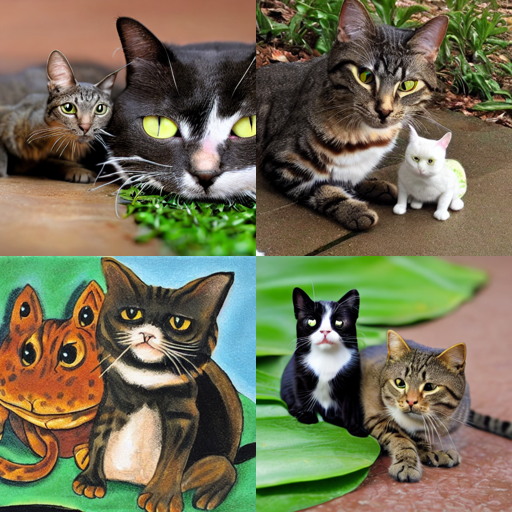

In [4]:
prompt = "a cat and a frog"
seeds = [6141, 9031, 969, 1910]

sd_images = []
for seed in seeds:
    image = pipeline(prompt, generator=torch.manual_seed(seed)).images[0]
    sd_images.append(image.resize((256, 256)))

image_grid(sd_images, 2, 2)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

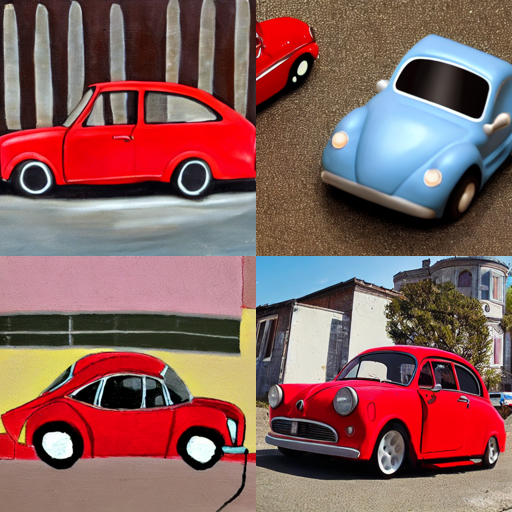

In [5]:
sd_images = []
seeds = [7803, 2098, 15792, 2354]
prompt = "a mouse and a red car"

for seed in seeds:
    image = pipeline(prompt, generator=torch.manual_seed(seed)).images[0]
    sd_images.append(image.resize((256, 256)))

image_grid(sd_images, 2, 2)

## Attend and Excite

### Load the pipeline

In [6]:
from diffusers import StableDiffusionAttendAndExcitePipeline

ae_pipeline = StableDiffusionAttendAndExcitePipeline.from_pretrained(
    ckpt_id, torch_dtype=torch.float16
)
ae_pipeline = ae_pipeline.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### Generate

In [7]:
prompt = "a cat and a frog"
indeces_to_alter = ae_pipeline.get_indices(prompt)
indeces_to_alter

{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'cat</w>',
 3: 'and</w>',
 4: 'a</w>',
 5: 'frog</w>',
 6: '<|endoftext|>'}

We want to manipulate "cat" (2) and "frog" (5).

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

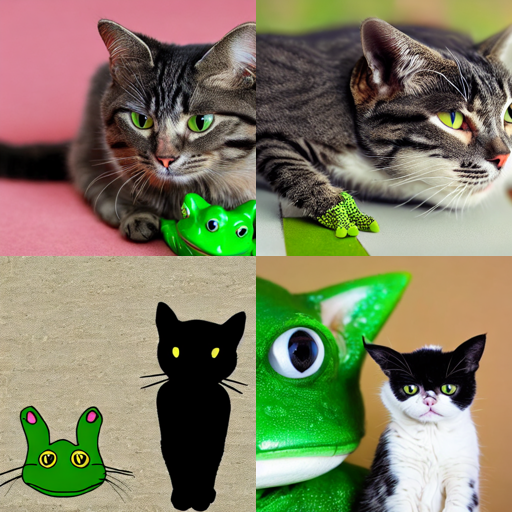

In [8]:
seeds = [6141, 9031, 969, 1910]
attend_and_excite_images = []
prompt = "a cat and a frog"

for seed in seeds:
    image = ae_pipeline(
        prompt=prompt,
        token_indices=[2, 5],
        generator=torch.manual_seed(seed),
        guidance_scale=7.5,
        max_iter_to_alter=25,
    ).images[0]
    attend_and_excite_images.append(image.resize((256, 256)))

image_grid(attend_and_excite_images, 2, 2)

In [9]:
prompt = "a mouse and a red car"
indeces_to_alter = ae_pipeline.get_indices(prompt)
indeces_to_alter

{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'mouse</w>',
 3: 'and</w>',
 4: 'a</w>',
 5: 'red</w>',
 6: 'car</w>',
 7: '<|endoftext|>'}

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

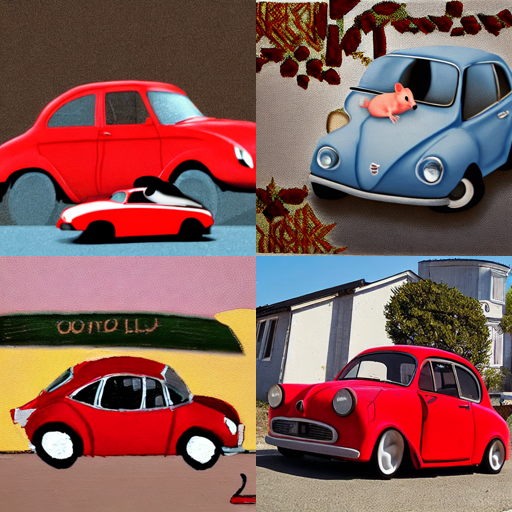

In [10]:
seeds = [7803, 2098, 15792, 2354]
attend_and_excite_images = []
prompt = "a mouse and a red car"

for seed in seeds:
    image = ae_pipeline(
        prompt=prompt,
        token_indices=[2, 5, 6],
        generator=torch.manual_seed(seed),
        guidance_scale=7.5,
        max_iter_to_alter=25,
    ).images[0]
    attend_and_excite_images.append(image.resize((256, 256)))

image_grid(attend_and_excite_images, 2, 2)